In [ ]:
!pip show torch
import torch

In [27]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data preparation

In [2]:
df =  pd.read_csv('Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
df['fare_amount'].describe(
)

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

Haversine furmula para poder calcular la distancia entre dos puntos

latitude $\varphi$ (phi) 
longitude $\lambda$ (lambda).

${\displaystyle d=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\:\cos(\varphi _{2})\:\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)}$


In [4]:
def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [5]:
df['distance'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   distance           120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [7]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [8]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [9]:
df['hour'] = df['EDTdate'].dt.hour
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,EDTdate,hour
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22


In [10]:
df['AMPM'] = np.where(df['hour']< 12, 'am', 'pm') 

In [11]:
df['Weekday'] = df['EDTdate'].dt.strftime('%a')

In [12]:
cat_cols = ['hour', 'AMPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'distance']
y_col = ['fare_amount']

In [13]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance                         float64
EDTdate              datetime64[ns, UTC]
hour                               int32
AMPM                              object
Weekday                           object
dtype: object

In [14]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [15]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance                         float64
EDTdate              datetime64[ns, UTC]
hour                            category
AMPM                            category
Weekday                         category
dtype: object

In [16]:
df['AMPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMPM, dtype: category
Categories (2, object): ['am', 'pm']

In [17]:
df['AMPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [18]:
df['AMPM'].cat.codes.values

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [19]:
hr = df['hour'].cat.codes.values
ampm = df['AMPM'].cat.codes.values
w = df['Weekday'].cat.codes.values

In [92]:
cats = np.stack([hr, ampm, w], axis=1)

In [93]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [94]:
cats = torch.tensor(cats, dtype=torch.int64)

In [102]:
conts = np.stack([df[col].values for col in cont_cols], 1)

In [103]:
conts = torch.tensor(conts,dtype=torch.float)

In [104]:
conts

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        ...,
        [ 40.7498, -73.9886,  40.7078, -74.0115,   3.0000,   5.0525],
        [ 40.7245, -74.0044,  40.7308, -73.9927,   1.0000,   1.2089],
        [ 40.7719, -73.9554,  40.7630, -73.9676,   3.0000,   1.4274]])

In [107]:
conts.type()

'torch.FloatTensor'

In [109]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1, 1)

In [110]:
cats.shape

torch.Size([120000, 3])

In [111]:
conts.shape

torch.Size([120000, 6])

In [112]:
y.shape

torch.Size([120000, 1])

In [113]:
catz = cats[:4]

In [114]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [115]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [116]:
cat_szs

[24, 2, 7]

In [117]:
emb_szs = [(size,min(50, (size+1)//2)) for size in cat_szs]


In [118]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [119]:
selfemb = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [120]:
selfemb

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [121]:
catz = cats[:2]

In [122]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [125]:
embeddinz = []

for i,e in enumerate(selfemb):
    print(catz[:, i])
    print(e)
    embeddinz.append(e(catz[:,i]))

tensor([ 4, 11])
Embedding(24, 12)
tensor([0, 0])
Embedding(2, 1)
tensor([1, 2])
Embedding(7, 4)


In [126]:
embeddinz

[tensor([[-0.8310, -0.4033,  0.2822, -0.0526, -0.1550,  0.7276, -1.5114, -0.6280,
           0.5836,  0.8987,  0.1314, -0.5629],
         [ 1.3794, -1.5464,  0.8206,  0.8308, -0.3519,  1.5085, -0.4748,  0.9093,
          -0.2052,  0.3035, -0.1459,  0.6447]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.5749],
         [-0.5749]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.5054, -0.3694, -0.3642, -0.7723],
         [ 0.8235, -0.7672, -0.4170,  0.4696]], grad_fn=<EmbeddingBackward0>)]

## Model preparation

In [127]:
class TabularModel(nn.Module):
    def __init__(self, emb, cont, out, layers, p=0.5):

        super().__init__()
        self.emb = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(cont)
        layerlist = []

        n_embs = sum([nf for ni, nf in emb_szs])
        n_in = n_embs + cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out))

        self.layers = nn.Sequential(*layerlist)
        
                                      
    def forward(self, x_cat, x_cont):
        embeddings = []

        for i,e in enumerate(self.emb):
            embeddings.append(e(x_cat[:, i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)

        return x 
        

In [128]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200, 100], p=0.4)

In [129]:
model

TabularModel(
  (emb): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [130]:
critirion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [131]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [132]:
cat_train = cats[:batch_size-test_size] 
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [133]:
cat_train = cat_train.long()

In [134]:
cont_train = con_train.clone().detach().float()

In [135]:
cat_train

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [ 0,  0,  0],
        [ 8,  0,  4],
        [23,  1,  2]])

In [136]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [137]:
len(cat_train)

48000

In [140]:
import time
start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1
    y_pred = model.forward(cat_train, con_train)
    loss = torch.sqrt(critirion(y_pred, y_train))
    losses.append(loss)

    if i%10 == 1:
        print(f"epoch : {i} loss : {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f"Training time : {duration/60} min ")

epoch : 1 loss : 3.697657585144043
epoch : 11 loss : 3.6491129398345947
epoch : 21 loss : 3.6365299224853516
epoch : 31 loss : 3.6171445846557617
epoch : 41 loss : 3.60310697555542
epoch : 51 loss : 3.578420877456665
epoch : 61 loss : 3.5666186809539795
epoch : 71 loss : 3.5634734630584717
epoch : 81 loss : 3.5137619972229004
epoch : 91 loss : 3.522200584411621
epoch : 101 loss : 3.473468780517578
epoch : 111 loss : 3.497042179107666
epoch : 121 loss : 3.4790337085723877
epoch : 131 loss : 3.449249029159546
epoch : 141 loss : 3.4530866146087646
epoch : 151 loss : 3.446211814880371
epoch : 161 loss : 3.444121837615967
epoch : 171 loss : 3.413839101791382
epoch : 181 loss : 3.4127609729766846
epoch : 191 loss : 3.3993523120880127
epoch : 201 loss : 3.3853275775909424
epoch : 211 loss : 3.37618350982666
epoch : 221 loss : 3.363180637359619
epoch : 231 loss : 3.3730132579803467
epoch : 241 loss : 3.372344732284546
epoch : 251 loss : 3.33497953414917
epoch : 261 loss : 3.3305835723876953
ep

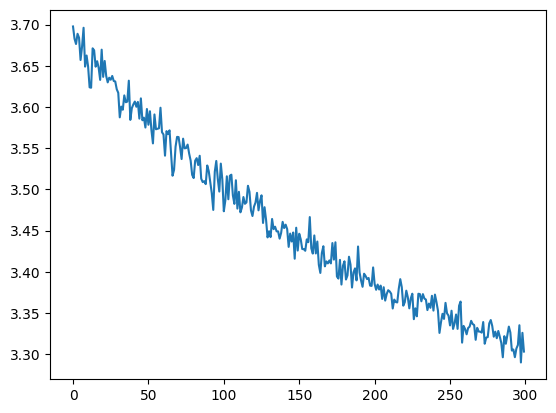

In [150]:
np_losses = np.array([ i.item() for i in losses])
np_range = np.array(range(300))
plt.plot(np_range, np_losses)

In [142]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(critirion(y_val, y_test))

In [143]:
loss

tensor(3.2905)

In [152]:
for i in range(10):
    print(f'Predicted : {y_val[i].item():8.2f} TRUE : {y_test[i].item():8.2f}')

Predicted :     3.00 TRUE :     2.90
Predicted :    22.88 TRUE :     5.70
Predicted :     7.16 TRUE :     7.70
Predicted :     9.18 TRUE :    12.50
Predicted :     5.35 TRUE :     4.10
Predicted :     5.51 TRUE :     5.30
Predicted :     4.50 TRUE :     3.70
Predicted :    17.12 TRUE :    14.50
Predicted :     4.43 TRUE :     5.70
Predicted :    11.76 TRUE :    10.10


In [153]:
torch.save(model, 'models/taxiModel.pt')